## Market Basket Analysis Study (Extra) ###
This is a sample Python implementation of Week 11 lesson. 

Demos in this notebook:
1. Apriori Algorithm Association Rule Mining

Uncomment and run the below code if you have not installed apyroi before.

In [77]:
import numpy as np  
import pandas as pd  
from apyori import apriori  

In [96]:
store_data = pd.read_csv('bucket_train.csv', header=None, low_memory=False)  
store_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,B000LQOCH0,B000CQ26E0,B004DMGQKE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B000UA0QIQ,B002Y7526Y,B000U9WZ54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B006K2ZZ7K,B003XDH6M6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B006K2ZZ7K,B0058AVD44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B000E7L2R4,B000E7QYNG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
store_data.shape

(72395, 20)

The Apriori library we are going to use requires our dataset to be in the form of a list of lists, where the whole dataset is a big list and each transaction in the dataset is an inner list within the outer big list. Currently we have data in the form of a pandas dataframe. To convert our pandas dataframe into a list of lists, execute the following script:

In [98]:
records = []  
for i in range(0, store_data.shape[0]):  
    records.append([str(store_data.values[i,j]) for j in range(0, store_data.shape[1])])
len(records)

72395

### Apriori Algorithm

Refer to the following links on for detail explanation on the implementation:
- [Association Rule Mining from StackAbuse](https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/)

The apriori class requires some parameter values to work. The first parameter is the list of list that you want to extract rules from. The second parameter is the min_support parameter. This parameter is used to select the items with support values greater than the value specified by the parameter. Next, the min_confidence parameter filters those rules that have confidence greater than the confidence threshold specified by the parameter. Similarly, the min_lift parameter specifies the minimum lift value for the short listed rules. Finally, the min_length parameter specifies the minimum number of items that you want in your rules.

In [157]:
min_supports=np.arange(0.004, 0.007, 0.001)
min_confidences=np.arange(0.1,0.2,0.025)
print(min_supports)
print(min_confidences)

[0.004 0.005 0.006]
[0.1   0.125 0.15  0.175]


In [158]:
#You are encourage to play with the different parameter settings for min_support, min_confidence, etc.
rule_matrix = [[0 for i in range(len(min_confidences))] for j in range(len(min_supports))]
for i, ms in enumerate(min_supports):
    for j, mc in enumerate(min_confidences):
        print('computing ',ms, mc)
        association_rules = apriori(records, min_support=ms, min_confidence=mc, min_lift=3, min_length=2)  
        association_results = list(association_rules)
        rule_dict = {}
        for item in association_results:
            pair = item[0] 
            items = [x for x in pair]
            if items[0] != 'nan' and items[1] != 'nan':
                rule_dict.setdefault(items[0], []).append(items[1])
        rule_matrix[i][j]=rule_dict

computing  0.004 0.1
computing  0.004 0.125
computing  0.004 0.15
computing  0.004 0.175
computing  0.005 0.1
computing  0.005 0.125
computing  0.005 0.15
computing  0.005 0.175
computing  0.006 0.1
computing  0.006 0.125
computing  0.006 0.15
computing  0.006 0.175


In [159]:
test_data = pd.read_csv('bucket_test.csv', header=None)  
test_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,B001EO5QW8,B000E1697S,B008J1HO4C,B001EO5U3I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B005DUM9UQ,B000P4Y8KO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B0019CW0HE,B0006346S8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B0019CW0HE,B004PSR43Y,B003C5RLGG,B000FBMFDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B001GVISJW,B004X8TK9W,B000FA398U,B000084EKO,B000084EKA,B000084EKB,B000084EKC,B000084EKD,B000084EKG,B000084EK8,B000084EK9,B000084EK4,B000084EK5,B000084EK6,B000084EK7,B0012KH06Y,B000BXUVYG,B004INIUQQ,B0012KB4WU,B007TJGZ54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8011,B009M2LUEW,B001KUWFPC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8012,B000EM8UGA,B001E5E08I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8013,B002BTI9B0,B001EO5OKC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8014,B003DVMYUW,B009AFJ3I6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
def getTestResult(test_data, rule_dict):
    correct_count = 0
    wrong_count = 0
    not_existing_count = 0
    for i in range(0, test_data.shape[0]):
        if test_data.values[i,0] in rule_dict:
            if test_data.values[i,1] in rule_dict[test_data.values[i,0]]:
                correct_count += 1
            else:
                wrong_count += 1
        else:
            not_existing_count += 1
    return (correct_count/(wrong_count+correct_count), correct_count/(wrong_count+correct_count+not_existing_count))



In [161]:
corr_ratio = [[getTestResult(test_data, j)[0] for j in i] for i in rule_matrix]
corr_ratio_with_missing = [[getTestResult(test_data, j)[1] for j in i] for i in rule_matrix]

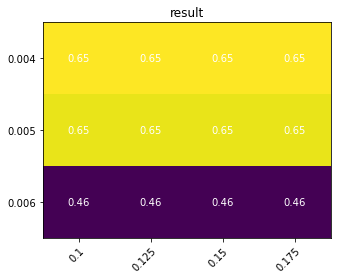

In [162]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
im = ax.imshow(corr_ratio)

# We want to show all ticks...
ax.set_xticks(np.arange(len(min_confidences)))
ax.set_yticks(np.arange(len(min_supports)))
# ... and label them with the respective list entries
ax.set_xticklabels(min_confidences)
ax.set_yticklabels(min_supports)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(min_supports)):
    for j in range(len(min_confidences)):
        text = ax.text(j, i, '%.2f' % corr_ratio[i][j],
                       ha="center", va="center", color="w")

ax.set_title("result")
fig.tight_layout()
plt.show()

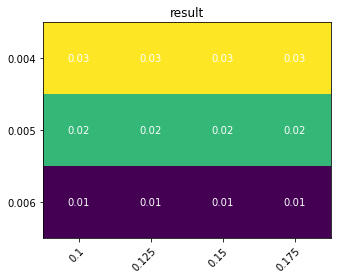

In [163]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
im = ax.imshow(corr_ratio_with_missing)

# We want to show all ticks...
ax.set_xticks(np.arange(len(min_confidences)))
ax.set_yticks(np.arange(len(min_supports)))
# ... and label them with the respective list entries
ax.set_xticklabels(min_confidences)
ax.set_yticklabels(min_supports)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(min_supports)):
    for j in range(len(min_confidences)):
        text = ax.text(j, i, '%.2f' % corr_ratio_with_missing[i][j],
                       ha="center", va="center", color="w")

ax.set_title("result")
fig.tight_layout()
plt.show()